- 在这个项目中，我们所使用的数据在chinese11.csv当中，我们需要从这个文件中把数据读取出来，并进行一些分析。

In [41]:
# 导入一些可能使用到的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False


In [34]:
# 这里是可以使用的一些十六进制的颜色
colors = ['#F1948A', '#AED6F1','#F9E79F','#E5E8E8', '#F1948A', '#D0ECE7','#F6DDCC', '#D2B4DE',
         '#117A65','#FAE5D3','#34495E','#DC7633','#D35400','#0E6251','#FCF3CF','#E8F8F5','#D4E6F1','#FADBD8','#E59866']


## 数据探索性分析

In [35]:
f = 'chinese11.csv'
data = pd.read_csv(f)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## 数据结果说明
- gender 性别
- age 年龄
- gender 性别
- Occupation 职业
- City_Category 城市类别
- Stay_In_Current_City_Years 所在城市居住年数
- Marital_Status 婚姻状况    
- Product_Category_1 产品类别
- Purchase 购买金额   

In [36]:
#TODO  获取数据的形状，可以根据其形状做一些数据推断
data.shape

# 获取后的解释说明:每行数据代表了一笔交易，共有537,577笔交易记录在该数据集中。

(537577, 12)

In [37]:
# 获取一共有多少种职业
data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [7]:
# 计算出我们的数据中一共有多少用户的数据
data['User_ID'].value_counts().count()

5891

In [8]:
# 获取数据的描述
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,537577.0,1.002992e+06,1714.392695,1000001.0,1001495.0,1003031.0,1004417.0,1006040.0
Occupation,537577.0,8.082710e+00,6.524120,0.0,2.0,7.0,14.0,20.0
Marital_Status,537577.0,4.087973e-01,0.491612,0.0,0.0,0.0,1.0,1.0
Product_Category_1,537577.0,5.295546e+00,3.750701,1.0,1.0,5.0,8.0,18.0
Product_Category_2,370591.0,9.842144e+00,5.087259,2.0,5.0,9.0,15.0,18.0
Product_Category_3,164278.0,1.266984e+01,4.124341,3.0,9.0,14.0,16.0,18.0
Purchase,537577.0,9.333860e+03,4981.022133,185.0,5866.0,8062.0,12073.0,23961.0


### 在这里写出你能够从上述的描述中看到的一些问题。

### TODO  
- 
- 
- 
- 


## 缺失值查看

In [9]:

## 统计数据的缺失值信息
data.isna().sum()


## 获取缺失值后的描述:根据统计，除了Product_Category_2与Product_Category_3列存在缺失值以外，其他列的数据都是无缺失值的。

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## 消费者性别

In [13]:
# 按照用户id来进行综合统计其性别和消费的金额总和
# 这里会使用到pivot_table，pandas中的透视表功能。
# data1 =data.groupby(['User_ID']).sum()
gender_purchase = pd.pivot_table(data=data,values=['Purchase'],index=['User_ID','Gender'],aggfunc=np.sum).reset_index()

# 计算后查看数据
gender_purchase.head(10)


,User_ID,Gender,Purchase
0,1000001,F,333481
1,1000002,M,810353
2,1000003,M,341635
3,1000004,M,205987
4,1000005,M,821001
5,1000006,F,379450
6,1000007,M,234427
7,1000008,M,796545
8,1000009,M,593960
9,1000010,F,2169486


In [21]:
# 计算消费者总数
gender_purchase.count()

User_ID     5891
Gender      5891
Purchase    5891
dtype: int64

In [31]:
# 统计男女所占比例  
gender_count = pd.pivot_table(data=gender_purchase,index='Gender',values='User_ID',aggfunc='count').reset_index().rename(columns={'User_ID':'人数'})
# 这里写计算方法
gender_count['占比'] = gender_count['人数'] / gender_count['人数'].sum()
gender_count

,Gender,人数,占比
0,F,1666,0.282804
1,M,4225,0.717196


In [50]:
gender_purchase_sum = pd.pivot_table(gender_purchase,index=['Gender'],values=['Purchase'],aggfunc=np.sum).reset_index()
gender_purchase_sum

,Gender,Purchase
0,F,1164624021
1,M,3853044357


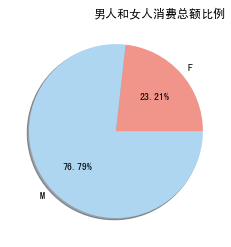

In [58]:

# 绘制饼图，描述出男人和女人消费的总额比例

plt.pie(gender_purchase_sum.Purchase,labels=gender_purchase_sum.Gender,autopct='%.2f%%',shadow=True,colors=colors[:2])


# 画图完毕后，要加上一点描述

plt.title('男人和女人消费总额比例',loc='right')

# 展示图形
plt.show()


从这个结果中你可以得出来什么样的结论吗？

比如男性和女性的人数占比，还有男性和女性的消费占比，你能看出来什么问题吗？




Text(0.5, 1.0, '消费者的购物消费分布')

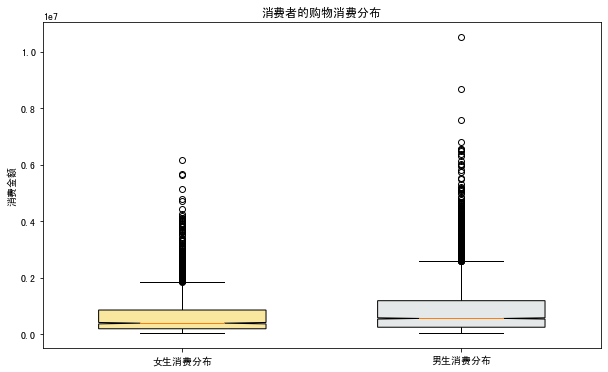

In [63]:
# 这里我们画一个箱型图，来看一下消费者的购物消费分布

# 首先把男人和女人分别的消费情况筛选出来
y_female = gender_purchase[gender_purchase.Gender == 'F'].Purchase
y_male = gender_purchase[gender_purchase.Gender == 'M'].Purchase


# 这里就是画图了
plt.figure(figsize=(10,6))
labels=['女生消费分布','男生消费分布']
bplot = plt.boxplot([y_female,y_male],labels=labels,sym='o',whis=1.5,widths=0.6,patch_artist=True,notch=True)
for patch,color in zip(bplot['boxes'],colors[2:4]):
    patch.set_facecolor(color)
plt.ylabel('消费金额')
plt.title('消费者的购物消费分布')





从这个图中，我们可以看到女性整体购买力不及男性购买力。

男性的消费比女性的消费更分散，因为男性的四分位距（IQR）更大
女性与男性的消费平均值(虚线)都比中位数(直线)要高，这说明，由于少数消费者的购物消费相比其他人要高出许多，从而拉高了平均值。

除了这些，你还能看出来哪些问题呢？？


## 热销产品

In [93]:
# 获取前10名的热销产品
# top10_sellers = pd.pivot_table(data=data,values='Purchase',index='Product_ID',aggfunc=np.sum)
top10_sellers = pd.pivot_table(data=data,values=['Purchase'],index=['Product_ID'],aggfunc=len).reset_index()\
.sort_values(by='Purchase',ascending=False)[:10]
#  这里需要使用透视表的功能进行计算
top10_sellers


,Purchase
Product_ID,
P00000142,12592163
P00000242,3914901
P00000342,1261383
P00000442,441173
P00000542,791219
...,...
P0099442,2813314
P0099642,83710
P0099742,967072


In [76]:
# 看一下都哪些人购买了这些热销产品
top_seller_buyers =   data[data['Product_ID'].isin(top10_sellers['Product_ID'])]
# 计算出购买热销产品的人都是哪些

top_seller_buyers.head(10)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
128,1000025,P00046742,M,18-25,4,C,4+,0,1,2.0,15.0,15770
224,1000042,P00046742,M,26-35,8,C,0,1,1,2.0,15.0,19433
235,1000044,P00112142,M,46-50,17,B,3,1,1,2.0,14.0,19072
342,1000058,P00110742,M,26-35,2,B,3,0,1,2.0,8.0,15824
399,1000066,P00265242,M,26-35,18,C,2,0,5,8.0,NaN,8652
406,1000069,P00184942,F,26-35,1,A,1,0,1,8.0,17.0,11715
467,1000086,P00145042,F,0-17,10,C,3,0,1,2.0,5.0,19283
546,1000100,P00059442,M,36-45,17,C,4+,0,6,8.0,16.0,12486


在以上的结果中，你是否发现 客户1000025和客户1000042买了同一款产品，但是购买价格确实不一样的。
目前猜测出现这种现象的原因是这可能和不同店家的促销活动、线上亦或是线下不同的购买方式、使用不同的voucher code、discount code、客户不同的会员等级享有不同的优惠有着直接或间接的关系。


## 热销产品销量与购买者性别之间的关系

In [78]:

top_seller_gender = pd.pivot_table(top_seller_buyers,index=['Product_ID','Gender'],values='Purchase',aggfunc='count').reset_index()
# 这里需要你计算一下热销产品销量和购买者性别之间的关系了


top_seller_gender.head(10)

,Product_ID,Gender,Purchase
0,P00025442,F,341
1,P00025442,M,1245
2,P00046742,F,301
3,P00046742,M,1116
4,P00057642,F,256
5,P00057642,M,1174
6,P00058042,F,378
7,P00058042,M,1018
8,P00059442,F,350
9,P00059442,M,1034


Text(0.5, 1.0, '消费者性别与热销产品的销量关系图')

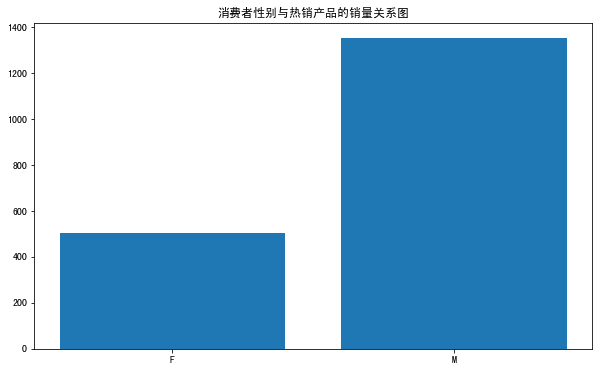

In [82]:
# 这里需要画一个图，把购买者性别和热销产品销量的关系绘制出来
plt.figure(figsize=(10,6))

plt.bar(top_seller_gender['Gender'],top_seller_gender['Purchase'])
plt.title('消费者性别与热销产品的销量关系图')




同样的，在排名前十的销量产品中，男性购买热销产品的数量远远高于女性，虽然我们并不知道这些具体的产品是什么。



## 热销产品的销量与城市的关系

In [84]:
top_seller_city = pd.pivot_table(data=top_seller_buyers,index=['Product_ID','City_Category'],values='Purchase',aggfunc=len).reset_index()
# 这里需要你计算一下热销产品的销量和城市之间的关系
top_seller_city.head()


,Product_ID,City_Category,Purchase
0,P00025442,A,317
1,P00025442,B,550
2,P00025442,C,719
3,P00046742,A,272
4,P00046742,B,531


In [86]:
tem = pd.pivot_table(top_seller_city,index='City_Category',values='Purchase',aggfunc=np.sum).reset_index()
tem

,City_Category,Purchase
0,A,3082
1,B,5394
2,C,6533


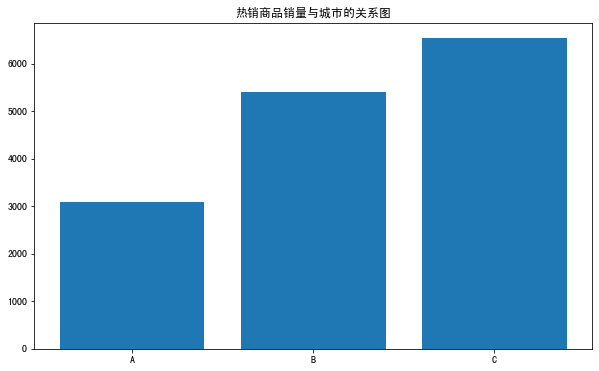

In [89]:

# 在这里把热销商品的销量和城市之间的关系绘制成为图形
plt.figure(figsize=(10,6))
plt.bar(tem['City_Category'],tem['Purchase'])
plt.title('热销商品销量与城市的关系图')
plt.show()



## 热销产品的销售额与城市的关系

In [91]:
top_seller_city2 =  pd.pivot_table(data=top_seller_buyers,index=['City_Category'],values='Purchase',aggfunc=np.sum).reset_index()

# 注意，这里需要你来计算的是销售额

top_seller_city2.head()

,City_Category,Purchase
0,A,43335136
1,B,77852883
2,C,94084204


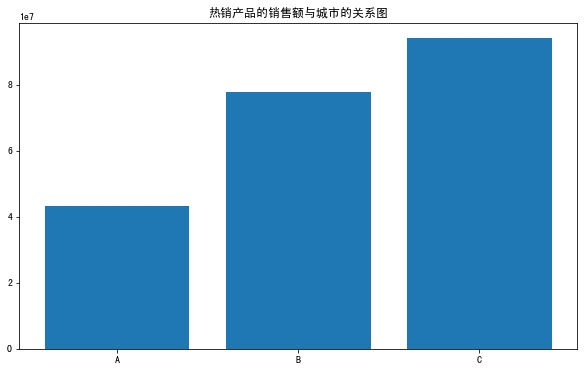

In [92]:
# 这里需要绘制一下 热销产品的销售额 与 城市 的关系   ， 注意，这里是销售额
plt.figure(figsize=(10,6))
plt.bar(top_seller_city2['City_Category'],top_seller_city2['Purchase'])
plt.title('热销产品的销售额与城市的关系图')
plt.show()

## 在这里，你来写一下能够从销量和销售额上分析出来哪些结果吗？比如哪类城市贡献和主要的销量，哪些城市贡献了重要的销售额，可以结合你的生活，猜测一下原因哦

- A城市的销量最少，C城市的销量最多
- A城市的销售额最少，C城市的销售额最多
- C城市贡献了最大的销售量


## 下面我们进一步分析，不同的城市，男性与女性购物的花销

In [95]:
# 获取到城市的信息
city = data.pivot_table(values='Purchase', 
                        index=['Gender','Age'],
                        columns=['City_Category'],
                        aggfunc='sum').reset_index()
city.head(20)

City_Category,Gender,Age,A,B,C
0,F,0-17,11262205,13730812,16833598
1,F,18-25,50215679,92415212,59578559
2,F,26-35,148523383,180093701,105240596
3,F,36-45,61143886,95347517,82519077
4,F,46-50,10678128,54472525,49646340
5,F,51-55,15286301,37331040,35355066
6,F,55+,3301694,11921944,29726758
7,M,0-17,10395014,33782970,46654407
8,M,18-25,189954309,292767819,216737702
9,M,26-35,499205289,645686249,420999888


In [31]:
# A类城市，
city.A

0      11262205
1      50215679
2     148523383
3      61143886
4      10678128
5      15286301
6       3301694
7      10395014
8     189954309
9     499205289
10    175222709
11     51943307
12     41869584
13     26667309
Name: A, dtype: int64

In [38]:
# 按照数据分组查看
data.groupby(by = ['Gender','Age','City_Category'])['Purchase'].sum().unstack()


City_Category          A          B          C
Gender Age                                    
F      0-17     11262205   13730812   16833598
       18-25    50215679   92415212   59578559
       26-35   148523383  180093701  105240596
       36-45    61143886   95347517   82519077
       46-50    10678128   54472525   49646340
       51-55    15286301   37331040   35355066
       55+       3301694   11921944   29726758
M      0-17     10395014   33782970   46654407
       18-25   189954309  292767819  216737702
       26-35   499205289  645686249  420999888
       36-45   175222709  331103247  265313129
       46-50    51943307  130539559  116138364
       51-55    41869584  126452857  105613508
       55+      26667309   37786160   88210977

## 男性 vs 女性 消费者的购物花销

In [96]:
# 这里需要你自己来进行计算啦。使用透视表的功能，来进行数据统计计算。
# 按照性别、年龄、城市分别计算出它们
city_gender = pd.pivot_table(data,index=['Gender','Age','City_Category'],values='Purchase',aggfunc=np.sum).reset_index()

# 查看计算后的效果
city_gender.head(20)

,Gender,Age,City_Category,Purchase
0,F,0-17,A,11262205
1,F,0-17,B,13730812
2,F,0-17,C,16833598
3,F,18-25,A,50215679
4,F,18-25,B,92415212
5,F,18-25,C,59578559
6,F,26-35,A,148523383
7,F,26-35,B,180093701
8,F,26-35,C,105240596
9,F,36-45,A,61143886


In [102]:
city_gender1 = pd.pivot_table(city_gender,index=['Gender','City_Category'],values='Purchase',aggfunc=np.sum).reset_index()
city_gender1

,Gender,City_Category,Purchase
0,F,A,300411276
1,F,B,485312751
2,F,C,378899994
3,M,A,995257521
4,M,B,1598118861
5,M,C,1259667975


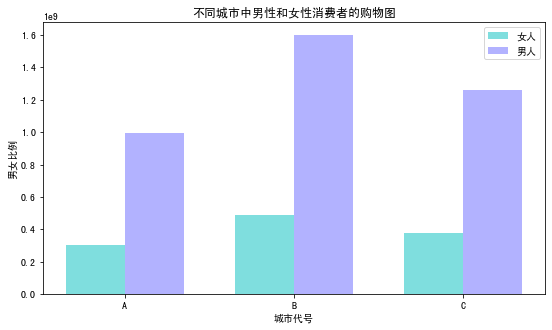

In [103]:
# 这里需要把不同 不同城市中 男性 和 女性 消费者的购物花销绘制成为一个柱状图，让男性和女性有一个对比的效果
x = np.arange(3)
bar_width = 0.35
tick_label = ['A','B','C']
plt.figure(figsize = (9,5))
plt.bar(x,city_gender1[city_gender1['Gender'] =='F']['Purchase'],bar_width,color='c',align='center',label= '女人',alpha=0.5)
plt.bar(x+bar_width,city_gender1[city_gender1['Gender'] =='M']['Purchase'],bar_width,color='b',align='center',label='男人',alpha=0.3)
plt.xlabel('城市代号')
plt.ylabel('男女比例')
plt.title('不同城市中男性和女性消费者的购物图')
plt.xticks(x+bar_width/2,tick_label)
plt.legend()
plt.show()

## 不同年龄段消费者的购物花销

In [104]:
# 这里我们开始计算出不同年龄段消费者的购物花销了
# 这里首先获得年龄、城市和购物花销计算后的数据
city_age = pd.pivot_table(data,index=['Age','City_Category'],values='Purchase',aggfunc=np.sum).reset_index()
city_age.head(20)

,Age,City_Category,Purchase
0,0-17,A,21657219
1,0-17,B,47513782
2,0-17,C,63488005
3,18-25,A,240169988
4,18-25,B,385183031
5,18-25,C,276316261
6,26-35,A,647728672
7,26-35,B,825779950
8,26-35,C,526240484
9,36-45,A,236366595


In [114]:
tick_label1=city_age['Age'].unique().tolist()
tick_label1

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

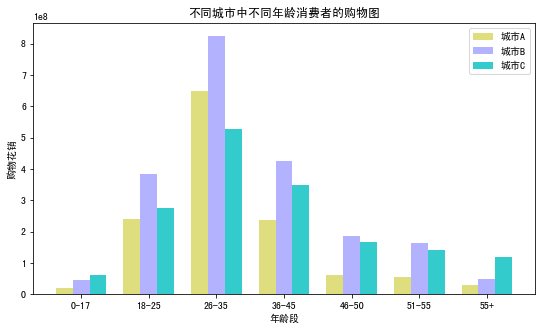

array([0, 1, 2, 3, 4, 5, 6])

In [117]:
# 城市A 城市B 城市C 按照不同年龄段消费者的购物花销 绘制成为一张图，你可以自由的去选择使用的图形，比如柱状图等
x1 = np.arange(7)
bar_width = 0.25
tick_label = tick_label1
plt.figure(figsize = (9,5))
plt.bar(x1,city_age[city_age['City_Category'] =='A']['Purchase'],bar_width,color='y',align='center',label= '城市A',alpha=0.5)
plt.bar(x1+bar_width,city_age[city_age['City_Category'] =='B']['Purchase'],bar_width,color='b',align='center',label='城市B',alpha=0.3)
plt.bar(x1+bar_width*2,city_age[city_age['City_Category'] =='C']['Purchase'],bar_width,color='c',align='center',label='城市C',alpha=0.8)
plt.xlabel('年龄段')
plt.ylabel('购物花销')
plt.title('不同城市中不同年龄消费者的购物图') 
plt.xticks(x1+bar_width,tick_label)
plt.legend()
plt.show()
x1

####  根据图形结果分析出在不同的城市中，男性的购物花销依和女性的购物花销哪个更高呢。
#### 并且哪个年龄段的消费者是城市的消费主力呢？

这里写一下你的结论
- 
- 在26-45岁的人民是城市的消费主力

- 在任何不同城市中，男性的购物花销都比女生的购物花销要高
- 
